In [1]:
from math import sqrt
import numpy as np
import pandas as pd
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from datetime import datetime
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from sklearn.metrics import matthews_corrcoef
from scipy.stats import spearmanr

In [2]:
def fun(s):
  new_data = read_csv('/content/drive/MyDrive/inno/data.csv', header=0, index_col=0)
  n = int((len(new_data))*(0.8))
  train = new_data[:n]
  valid = new_data[n:]
  x_train = train.drop(s, axis=1)
  y_train = train[s]
  x_valid = valid.drop(s, axis=1)
  y_valid = valid[s]

  #implement linear regression
  from sklearn.linear_model import LinearRegression
  model = LinearRegression()
  model.fit(x_train,y_train)
  preds = model.predict(x_valid)
  
  valid = valid.assign(Predictions = preds)
  gr = valid[[s, 'Predictions']]
  gr.plot()
  pyplot.show()

  rmse = np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
  print('Test RMSE(Root Mean Squared Error)  : %.3f' % rmse)
  cc = spearmanr(preds, y_valid)
  print('Test CC(Corelation Coefficient)     : %.3f' % cc.correlation)
  inv_yhat = preds
  inv_y = valid[s]
  xpb, xob, num, den = 0, 0, 0, 0
  for y in inv_yhat:
    xpb += y
  xpb = xpb/len(inv_yhat)
  for y in inv_y:
    xob += y
    num += y - xpb
    den += y
  xob = xob/len(inv_y)
  pb = num/den
  print('Test PB(Percentage Bias)            : %.3f' % pb)
  num, den = 0, 0
  for i in range(0, len(inv_y)):
    num += ((inv_y[i] - inv_yhat[i])*(inv_y[i] - inv_yhat[i]))
    den += ((inv_y[i] - xob)*(inv_y[i] - xob))
  nse = abs(1 - (num/den))
  print('Test NSE(Nash Sutcliffe Efficiency) : %.3f' % nse)

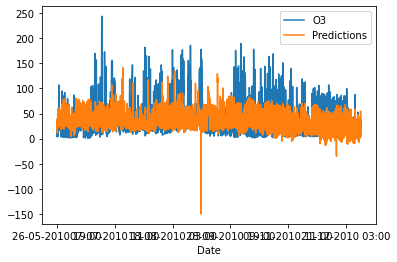

Test RMSE(Root Mean Squared Error)  : 35.099
Test CC(Corelation Coefficient)     : 0.456
Test PB(Percentage Bias)            : 0.045
Test NSE(Nash Sutcliffe Efficiency) : 0.007


In [3]:
fun('O3')

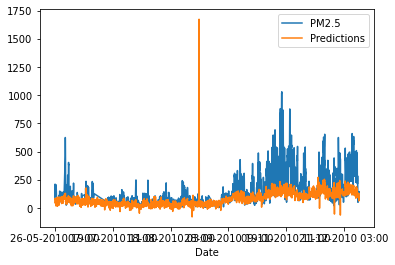

Test RMSE(Root Mean Squared Error)  : 128.266
Test CC(Corelation Coefficient)     : 0.810
Test PB(Percentage Bias)            : 0.433
Test NSE(Nash Sutcliffe Efficiency) : 0.166


In [4]:
fun('PM2.5')

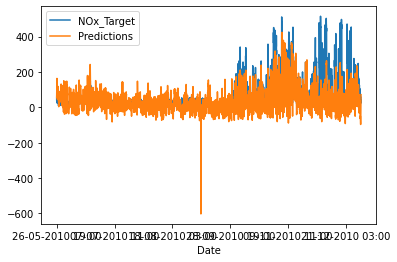

Test RMSE(Root Mean Squared Error)  : 69.605
Test CC(Corelation Coefficient)     : 0.526
Test PB(Percentage Bias)            : 0.365
Test NSE(Nash Sutcliffe Efficiency) : 0.274


In [5]:
fun('NOx_Target')

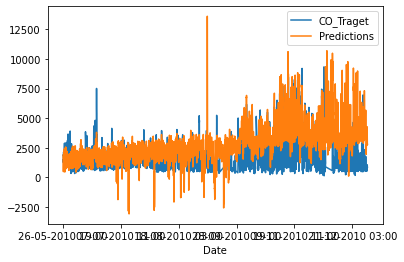

Test RMSE(Root Mean Squared Error)  : 1931.802
Test CC(Corelation Coefficient)     : 0.310
Test PB(Percentage Bias)            : -0.750
Test NSE(Nash Sutcliffe Efficiency) : 1.297


In [6]:
fun('CO_Traget')